In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics

from time import time
from sklearnex import patch_sklearn
import warnings
warnings.filterwarnings('ignore')

In [93]:
data=pd.read_csv("C:/Users/attil/Downloads/monthly_data_use_with_daily_hsi.csv");data

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
0,2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
1,2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2,2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
3,2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
4,2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
5,2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
6,2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
7,2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
8,2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237
9,2020-10-31,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,...,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0,-0.083808,0.027638


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pubdate                                      33 non-null     object 
 1   non_view_engagements                         33 non-null     int64  
 2   comment_count                                33 non-null     float64
 3   like_count                                   33 non-null     float64
 4   dislike_count                                33 non-null     float64
 5   love_count                                   33 non-null     float64
 6   haha_count                                   33 non-null     float64
 7   wow_count                                    33 non-null     float64
 8   angry_count                                  33 non-null     float64
 9   sad_count                                    33 non-null     float64
 10  shar

In [95]:
hsi=pd.read_csv("HSI.csv");hsi

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-08,30895.089844,30929.150391,30732.539063,30899.529297,30899.529297,2004162500
1,2018-01-09,30933.509766,31056.699219,30852.429688,31011.410156,31011.410156,2004940800
2,2018-01-10,31009.240234,31267.570313,30928.580078,31073.720703,31073.720703,2595365800
3,2018-01-11,31066.210938,31133.179688,30950.070313,31120.390625,31120.390625,1794778900
4,2018-01-12,31298.050781,31412.539063,31198.359375,31412.539063,31412.539063,2327417400
...,...,...,...,...,...,...,...
1227,2022-12-29,19648.400391,19764.519531,19539.839844,19741.140625,19741.140625,2902362900
1228,2022-12-30,20030.849609,20073.919922,19781.410156,19781.410156,19781.410156,1747706800
1229,2023-01-03,19570.429688,20212.550781,19303.730469,20145.289063,20145.289063,2286651100
1230,2023-01-04,20319.980469,20793.109375,20233.390625,20793.109375,20793.109375,3015986300


In [96]:
hsi["Date"]=pd.to_datetime(hsi["Date"])
hsi.set_index(["Date"],inplace=True)
hsi_1=hsi["2020-01-01":].copy()

In [97]:
hsi_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28249.369141,28543.519531,28245.970703,28543.519531,28543.519531,1262732800
2020-01-03,28828.359375,28883.300781,28428.169922,28451.500000,28451.500000,1797904800
2020-01-06,28326.500000,28367.869141,28054.289063,28226.189453,28226.189453,1793426600
2020-01-07,28352.679688,28473.080078,28264.070313,28322.060547,28322.060547,1302687200
2020-01-08,27999.580078,28198.609375,27857.730469,28087.919922,28087.919922,1709241600
...,...,...,...,...,...,...
2022-12-29,19648.400391,19764.519531,19539.839844,19741.140625,19741.140625,2902362900
2022-12-30,20030.849609,20073.919922,19781.410156,19781.410156,19781.410156,1747706800
2023-01-03,19570.429688,20212.550781,19303.730469,20145.289063,20145.289063,2286651100


In [98]:
hsi_month=hsi_1.copy().reset_index()
hsi_month['yymm']=pd.DatetimeIndex(hsi_month['Date']).year*100+pd.DatetimeIndex(hsi_month['Date']).month
hsi_month=hsi_month.sort_values(by="Date").drop_duplicates(subset=["yymm"], keep="last")

In [99]:
hsi_month

,Date,Open,High,Low,Close,Adj Close,Volume,yymm
19,2020-01-31,26757.609375,26818.839844,26295.490234,26312.630859,26312.630859,1874255200,202001
39,2020-02-28,26249.060547,26313.550781,25989.410156,26129.929688,26129.929688,3191426200,202002
61,2020-03-31,23613.269531,23627.529297,23238.039063,23603.480469,23603.480469,2876326600,202003
80,2020-04-29,24786.019531,24855.470703,24549.619141,24643.589844,24643.589844,1648009000,202004
100,2020-05-29,22781.109375,23089.769531,22781.109375,22961.470703,22961.470703,3621412000,202005
121,2020-06-30,24468.240234,24598.609375,24271.769531,24427.189453,24427.189453,1892323300,202006
143,2020-07-31,24747.289063,24938.849609,24534.789063,24595.349609,24595.349609,1763233900,202007
164,2020-08-31,25732.490234,25847.109375,25177.050781,25177.050781,25177.050781,3195378200,202008
186,2020-09-30,23548.890625,23780.869141,23368.490234,23459.050781,23459.050781,1453016000,202009
204,2020-10-30,24535.900391,24600.539063,24029.949219,24107.419922,24107.419922,2537744200,202010


In [100]:
hsi_month["Date"]=pd.to_datetime(hsi_month["Date"])
hsi_month.set_index(["Date"],inplace=True)
hsi_month1=hsi_month.apply(lambda x:(x-x[0])/x[0]);hsi_month1

,Open,High,Low,Close,Adj Close,Volume,yymm
Date,,,,,,,
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-28,-0.019006,-0.018841,-0.011640,-0.006943,-0.006943,0.702770,0.000005
2020-03-31,-0.117512,-0.118995,-0.116273,-0.102960,-0.102960,0.534650,0.000010
2020-04-29,-0.073683,-0.073209,-0.066394,-0.063431,-0.063431,-0.120713,0.000015
2020-05-29,-0.148612,-0.139047,-0.133650,-0.127359,-0.127359,0.932187,0.000020
2020-06-30,-0.085560,-0.082786,-0.076961,-0.071655,-0.071655,0.009640,0.000025
2020-07-31,-0.075131,-0.070100,-0.066958,-0.065265,-0.065265,-0.059235,0.000030
2020-08-31,-0.038311,-0.036233,-0.042534,-0.043157,-0.043157,0.704879,0.000035
2020-09-30,-0.119918,-0.113277,-0.111312,-0.108449,-0.108449,-0.224750,0.000040


In [101]:
data["pubdate"]=pd.to_datetime(data["pubdate"])
data.set_index(["pubdate"],inplace=True)

In [102]:
data["hsi_accu_return"]=hsi_month1["Close"][:"2022-10-01"];data

,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
pubdate,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,NaN,-0.006943
2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,1664.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,9759.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,NaN,0.044066
2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,15682.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,NaN,-0.068258
2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,42664.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,41344.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,45865.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,11908.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237


In [103]:
data["hsi_accu_return"]

pubdate
2020-01-31    0.000000
2020-02-29         NaN
2020-03-31   -0.102960
2020-04-30         NaN
2020-05-31         NaN
2020-06-30   -0.071655
2020-07-31   -0.065265
2020-08-31   -0.043157
2020-09-30   -0.108449
2020-10-31         NaN
2020-11-30    0.001097
2020-12-31    0.034907
2021-01-31         NaN
2021-02-28         NaN
2021-03-31    0.078507
2021-04-30    0.091677
2021-05-31    0.107901
2021-06-30    0.095594
2021-07-31         NaN
2021-08-31   -0.016480
2021-09-30   -0.066014
2021-10-31         NaN
2021-11-30   -0.107833
2021-12-31   -0.110782
2022-01-31   -0.095406
2022-02-28   -0.136802
2022-03-31   -0.164019
2022-04-30         NaN
2022-05-31   -0.186125
2022-06-30   -0.169228
2022-07-31         NaN
2022-08-31   -0.241642
2022-09-30   -0.345454
Name: hsi_accu_return, dtype: float64

In [104]:
data["hsi_accu_return"]["2020-02-29"]=-0.006943
data["hsi_accu_return"]["2020-04-30"]=-0.063431
data["hsi_accu_return"]["2020-05-31"]=-0.127359
data["hsi_accu_return"]["2020-10-31"]=-0.083808
data["hsi_accu_return"]["2021-01-31"]=0.074910
data["hsi_accu_return"]["2021-02-28"]=0.101380
data["hsi_accu_return"]["2021-07-31"]=-0.099449
data["hsi_accu_return"]["2021-10-31"]=-0.035549
data["hsi_accu_return"]["2022-04-30"]=-0.198507
data["hsi_accu_return"]["2022-07-31"]=-0.233961

In [105]:
data

,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
pubdate,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,1664.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,9759.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,15682.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,42664.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,41344.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,45865.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,11908.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237


In [106]:
hsi_month1

,Open,High,Low,Close,Adj Close,Volume,yymm
Date,,,,,,,
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-28,-0.019006,-0.018841,-0.011640,-0.006943,-0.006943,0.702770,0.000005
2020-03-31,-0.117512,-0.118995,-0.116273,-0.102960,-0.102960,0.534650,0.000010
2020-04-29,-0.073683,-0.073209,-0.066394,-0.063431,-0.063431,-0.120713,0.000015
2020-05-29,-0.148612,-0.139047,-0.133650,-0.127359,-0.127359,0.932187,0.000020
2020-06-30,-0.085560,-0.082786,-0.076961,-0.071655,-0.071655,0.009640,0.000025
2020-07-31,-0.075131,-0.070100,-0.066958,-0.065265,-0.065265,-0.059235,0.000030
2020-08-31,-0.038311,-0.036233,-0.042534,-0.043157,-0.043157,0.704879,0.000035
2020-09-30,-0.119918,-0.113277,-0.111312,-0.108449,-0.108449,-0.224750,0.000040


In [107]:
data

,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
pubdate,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,1664.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,9759.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,15682.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,42664.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,41344.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,45865.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,11908.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237


In [108]:
data_1=data.copy()
from scipy import stats
data=data.apply(stats.zscore)
data=data.clip(lower=-2,upper=2)
data["hsi_accu_return"]=data_1["hsi_accu_return"]
data["monthly_return"]=data_1["monthly_return"]
# data_train=data[:"2021-07-01"]
# data_test=data["2021-07-01":]



In [109]:
data_1=data_1.reset_index()

In [110]:
data_1

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
0,2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
1,2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2,2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
3,2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
4,2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
5,2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
6,2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
7,2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
8,2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237
9,2020-10-31,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,...,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0,-0.083808,0.027638


In [111]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   pubdate                                      33 non-null     datetime64[ns]
 1   non_view_engagements                         33 non-null     int64         
 2   comment_count                                33 non-null     float64       
 3   like_count                                   33 non-null     float64       
 4   dislike_count                                33 non-null     float64       
 5   love_count                                   33 non-null     float64       
 6   haha_count                                   33 non-null     float64       
 7   wow_count                                    33 non-null     float64       
 8   angry_count                                  33 non-null     float64       
 9   s

In [112]:
data_train=data_1[:20]
data_test=data_1[20:]

In [113]:
data_train

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
0,2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
1,2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2,2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
3,2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
4,2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
5,2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
6,2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
7,2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
8,2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237
9,2020-10-31,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,...,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0,-0.083808,0.027638


In [114]:
data_test

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
20,2021-09-30,322813,17756.0,264790.0,400.0,2166.0,7641.0,8538.0,688.0,5737.0,...,3750.0,385.0,389.0,1728.0,414.0,376.0,146.0,22314.0,-0.066014,-0.050363
21,2021-10-31,1836432,109256.0,1511111.0,4905.0,6632.0,46654.0,21600.0,51375.0,24655.0,...,7201.0,484.0,1263.0,2983.0,811.0,449.0,320.0,39096.0,-0.035549,0.032618
22,2021-11-30,308004,15975.0,277738.0,1348.0,637.0,1543.0,2308.0,1181.0,2031.0,...,2906.0,377.0,315.0,579.0,426.0,238.0,179.0,14522.0,-0.107833,-0.074948
23,2021-12-31,384338,16095.0,339345.0,0.0,700.0,10673.0,7075.0,632.0,898.0,...,2897.0,434.0,466.0,1039.0,394.0,313.0,117.0,16400.0,-0.110782,-0.003305
24,2022-01-31,476198,25420.0,446221.0,0.0,305.0,1421.0,225.0,231.0,315.0,...,2134.0,221.0,347.0,358.0,311.0,166.0,88.0,9468.0,-0.095406,0.017292
25,2022-02-28,553543,29329.0,519226.0,0.0,237.0,301.0,899.0,190.0,476.0,...,1903.0,227.0,260.0,296.0,459.0,153.0,71.0,8728.0,-0.136802,-0.045762
26,2022-03-31,360067,14026.0,335970.0,0.0,377.0,2411.0,2091.0,260.0,460.0,...,1890.0,396.0,258.0,604.0,532.0,202.0,93.0,11042.0,-0.164019,-0.031531
27,2022-04-30,449306,18723.0,419008.0,0.0,505.0,1456.0,3036.0,614.0,786.0,...,1447.0,515.0,233.0,342.0,193.0,348.0,86.0,11134.0,-0.198507,-0.041254
28,2022-05-31,757043,25239.0,684632.0,0.0,724.0,20055.0,7406.0,971.0,2839.0,...,1646.0,297.0,321.0,574.0,340.0,174.0,69.0,10466.0,-0.186125,0.015449
29,2022-06-30,925382,35857.0,828439.0,0.0,1977.0,23246.0,9964.0,1507.0,8273.0,...,2075.0,259.0,295.0,670.0,191.0,248.0,92.0,10346.0,-0.169228,0.020760


In [115]:
data_1

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
0,2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
1,2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2,2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
3,2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
4,2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
5,2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
6,2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
7,2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
8,2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237
9,2020-10-31,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,...,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0,-0.083808,0.027638


In [116]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   pubdate                                      33 non-null     datetime64[ns]
 1   non_view_engagements                         33 non-null     int64         
 2   comment_count                                33 non-null     float64       
 3   like_count                                   33 non-null     float64       
 4   dislike_count                                33 non-null     float64       
 5   love_count                                   33 non-null     float64       
 6   haha_count                                   33 non-null     float64       
 7   wow_count                                    33 non-null     float64       
 8   angry_count                                  33 non-null     float64       
 9   s

In [117]:
name=list(data_1.columns)[1:-2];name

['non_view_engagements',
 'comment_count',
 'like_count',
 'dislike_count',
 'love_count',
 'haha_count',
 'wow_count',
 'angry_count',
 'sad_count',
 'share_count',
 'view_count',
 'emoji_count',
 'fans_count',
 'sentiment_label_headline_negative',
 'sentiment_label_headline_neutral',
 'sentiment_label_headline_positive',
 'sentiment_label_content_negative',
 'sentiment_label_content_neutral',
 'sentiment_label_content_positive',
 'ESG_label_headline_Business Ethics & Values',
 'ESG_label_headline_Climate Change',
 'ESG_label_headline_Community Relations',
 'ESG_label_headline_Corporate Governance',
 'ESG_label_headline_Human Capital',
 'ESG_label_headline_Natural Capital',
 'ESG_label_headline_Non-ESG',
 'ESG_label_headline_Pollution & Waste',
 'ESG_label_headline_Product Liability',
 'ESG_label_content_Business Ethics & Values',
 'ESG_label_content_Climate Change',
 'ESG_label_content_Community Relations',
 'ESG_label_content_Corporate Governance',
 'ESG_label_content_Human Capital'

In [118]:
x_train=data_train[name]
y_train=data_train["hsi_accu_return"]
X_train_shift = x_train.values
Y_train_shift = y_train.values
x_test=data_test[name]
y_test=data_test["hsi_accu_return"]
X_test_shift = x_test.values
Y_test_shift = y_test.values

In [119]:
x_train

,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,ESG_label_content_Business Ethics & Values,ESG_label_content_Climate Change,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,281.0,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,345.0,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0
2,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,1664.0,...,12.0,520.0,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0
3,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,9759.0,...,63.0,569.0,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0
4,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,15682.0,...,60.0,1185.0,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0
5,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,42664.0,...,48.0,1581.0,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0
6,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,41344.0,...,93.0,1769.0,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0
7,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,45865.0,...,71.0,3139.0,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0
8,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,11908.0,...,41.0,1473.0,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0
9,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,34010.0,...,104.0,2117.0,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0


In [120]:
X_train_shift

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.97000000e+02, 1.02100000e+03, 4.38000000e+02,
        3.02000000e+02, 9.99000000e+02, 4.55000000e+02, 3.00000000e+01,
        2.89000000e+02, 7.43000000e+02, 1.09000000e+02, 6.50000000e+01,
        2.93000000e+02, 1.00000000e+02, 6.50000000e+01, 6.20000000e+01,
        1.60000000e+01, 2.81000000e+02, 6.78000000e+02, 1.19000000e+02,
        7.60000000e+01, 3.45000000e+02, 1.19000000e+02, 8.20000000e+01,
        4.00000000e+01, 3.51200000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.59000000e+02, 1.01900000e+03, 2.58000000e+02,
        2.43000000e+02,

In [121]:
y_train

0     0.000000
1    -0.006943
2    -0.102960
3    -0.063431
4    -0.127359
5    -0.071655
6    -0.065265
7    -0.043157
8    -0.108449
9    -0.083808
10    0.001097
11    0.034907
12    0.074910
13    0.101380
14    0.078507
15    0.091677
16    0.107901
17    0.095594
18   -0.099449
19   -0.016480
Name: hsi_accu_return, dtype: float64

In [122]:
Y_train_shift 

array([ 0.        , -0.006943  , -0.10296007, -0.063431  , -0.127359  ,
       -0.07165537, -0.06526452, -0.04315722, -0.10844906, -0.083808  ,
        0.00109679,  0.03490719,  0.07491   ,  0.10138   ,  0.07850674,
        0.0916765 ,  0.10790141,  0.09559357, -0.099449  , -0.01648032])

In [123]:
X_test_shift

array([[3.22813000e+05, 1.77560000e+04, 2.64790000e+05, 4.00000000e+02,
        2.16600000e+03, 7.64100000e+03, 8.53800000e+03, 6.88000000e+02,
        5.73700000e+03, 1.28590000e+04, 3.16119300e+06, 2.23800000e+03,
        7.84526150e+08, 9.68000000e+02, 8.36200000e+03, 1.82700000e+03,
        6.76000000e+02, 8.20500000e+03, 2.27600000e+03, 1.10000000e+02,
        2.17800000e+03, 3.56000000e+03, 5.83000000e+02, 3.78000000e+02,
        1.44600000e+03, 2.11700000e+03, 3.59000000e+02, 4.26000000e+02,
        1.48600000e+03, 2.48300000e+03, 3.75000000e+03, 3.85000000e+02,
        3.89000000e+02, 1.72800000e+03, 4.14000000e+02, 3.76000000e+02,
        1.46000000e+02, 2.23140000e+04],
       [1.83643200e+06, 1.09256000e+05, 1.51111100e+06, 4.90500000e+03,
        6.63200000e+03, 4.66540000e+04, 2.16000000e+04, 5.13750000e+04,
        2.46550000e+04, 4.76870000e+04, 1.20351440e+07, 1.25570000e+04,
        1.59220094e+09, 2.36100000e+03, 1.47370000e+04, 2.45000000e+03,
        1.75800000e+03,

In [124]:
Y_test_shift

array([-0.06601355, -0.035549  , -0.10783304, -0.11078181, -0.09540555,
       -0.13680165, -0.16401937, -0.198507  , -0.18612474, -0.1692283 ,
       -0.233961  , -0.24164213, -0.34545389])

In [125]:
# X_test_trans

In [126]:
# X_train_trans

Using training set data to test the prediction power in in-sample data

In [127]:
scaler = preprocessing.MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train_shift)
# X_test_trans=scaler.fit_transform(X_test_shift)

from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train_trans,Y_train_shift)
Y_train_pred = clf.predict(X_train_trans)
train_act_pred=pd.DataFrame({'Actual': Y_train_shift, 'Predicted': Y_train_pred})


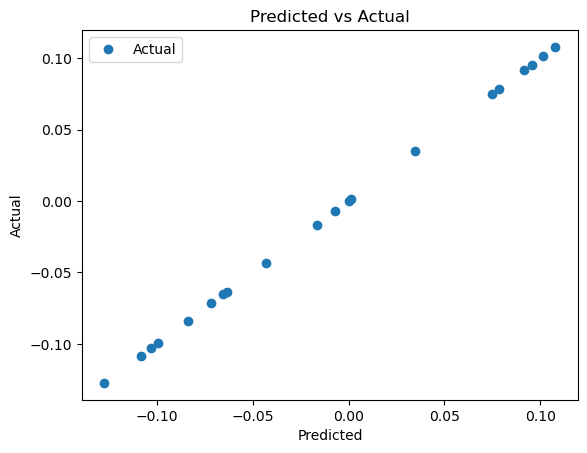

In [128]:
train_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train_shift,Y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train_shift,Y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train_shift,Y_train_pred)))     
print('R-square:', metrics.r2_score(Y_train_shift,Y_train_pred))

Mean Absolute Error: 6.081723666340188e-16
Mean Squared Error: 6.2137805468223715e-31
Root Mean Squared Error: 7.882753672938392e-16
R-square: 1.0


In [130]:
clf.coef_

array([-0.02278756, -0.25616471, -0.01211528, -0.09693353,  0.10777596,
        0.04004438,  0.09278152,  0.13762112, -0.08899505, -0.02760888,
        0.34070771, -0.01511145,  0.25245891, -0.02039561, -0.07005648,
        0.38751042,  0.00819644, -0.08268912,  0.33348679,  0.11873922,
       -0.15450551,  0.10364814, -0.13385677, -0.09960525, -0.04008055,
        0.03823257, -0.13469513,  0.01569465,  0.03813534,  0.04405979,
        0.00727075, -0.09038889, -0.05059416,  0.03239125, -0.12187968,
       -0.20639434, -0.16245989, -0.00740375])

In [131]:
clf.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [132]:
train_act_pred

,Actual,Predicted
0,0.000000,3.384879e-16
1,-0.006943,-6.943000e-03
2,-0.102960,-1.029601e-01
3,-0.063431,-6.343100e-02
4,-0.127359,-1.273590e-01
5,-0.071655,-7.165537e-02
6,-0.065265,-6.526452e-02
7,-0.043157,-4.315722e-02
8,-0.108449,-1.084491e-01
9,-0.083808,-8.380800e-02


In [133]:
print(clf.intercept_, clf.coef_)

-0.000792620736139605 [-0.02278756 -0.25616471 -0.01211528 -0.09693353  0.10777596  0.04004438
  0.09278152  0.13762112 -0.08899505 -0.02760888  0.34070771 -0.01511145
  0.25245891 -0.02039561 -0.07005648  0.38751042  0.00819644 -0.08268912
  0.33348679  0.11873922 -0.15450551  0.10364814 -0.13385677 -0.09960525
 -0.04008055  0.03823257 -0.13469513  0.01569465  0.03813534  0.04405979
  0.00727075 -0.09038889 -0.05059416  0.03239125 -0.12187968 -0.20639434
 -0.16245989 -0.00740375]


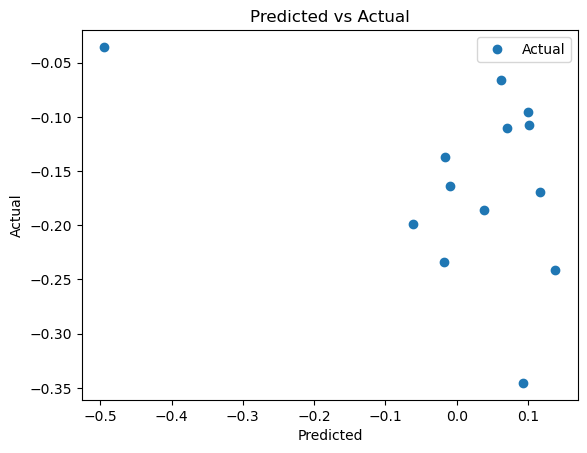

In [134]:
X_test_trans = scaler.transform(X_test_shift)
Y_test_pred = clf.predict(X_test_trans)
test_act_pred=pd.DataFrame({'Actual': Y_test_shift, 'Predicted': Y_test_pred})
test_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_shift,Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_shift,Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_shift,Y_test_pred)))     
print('R-square:', metrics.r2_score(Y_test_shift,Y_test_pred))

Mean Absolute Error: 0.24080937413629838
Mean Squared Error: 0.07034249937430953
Root Mean Squared Error: 0.26522160427519764
R-square: -10.022613576770288


In [136]:
test_act_pred

,Actual,Predicted
0,-0.066014,0.061943
1,-0.035549,-0.494085
2,-0.107833,0.100773
3,-0.110782,0.070174
4,-0.095406,0.100644
5,-0.136802,-0.015895
6,-0.164019,-0.008736
7,-0.198507,-0.061003
8,-0.186125,0.037962
9,-0.169228,0.116202


In [137]:
data_1[name]

,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,share_count,...,ESG_label_content_Business Ethics & Values,ESG_label_content_Climate Change,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,281.0,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,345.0,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0
2,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,1664.0,...,12.0,520.0,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0
3,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,9759.0,...,63.0,569.0,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0
4,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,15682.0,...,60.0,1185.0,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0
5,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,42664.0,...,48.0,1581.0,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0
6,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,41344.0,...,93.0,1769.0,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0
7,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,45865.0,...,71.0,3139.0,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0
8,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,11908.0,...,41.0,1473.0,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0
9,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,34010.0,...,104.0,2117.0,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0


In [138]:
data_1["hsi_accu_return"]

0     0.000000
1    -0.006943
2    -0.102960
3    -0.063431
4    -0.127359
5    -0.071655
6    -0.065265
7    -0.043157
8    -0.108449
9    -0.083808
10    0.001097
11    0.034907
12    0.074910
13    0.101380
14    0.078507
15    0.091677
16    0.107901
17    0.095594
18   -0.099449
19   -0.016480
20   -0.066014
21   -0.035549
22   -0.107833
23   -0.110782
24   -0.095406
25   -0.136802
26   -0.164019
27   -0.198507
28   -0.186125
29   -0.169228
30   -0.233961
31   -0.241642
32   -0.345454
Name: hsi_accu_return, dtype: float64

In [139]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   pubdate                                      33 non-null     datetime64[ns]
 1   non_view_engagements                         33 non-null     int64         
 2   comment_count                                33 non-null     float64       
 3   like_count                                   33 non-null     float64       
 4   dislike_count                                33 non-null     float64       
 5   love_count                                   33 non-null     float64       
 6   haha_count                                   33 non-null     float64       
 7   wow_count                                    33 non-null     float64       
 8   angry_count                                  33 non-null     float64       
 9   s

<AxesSubplot:>

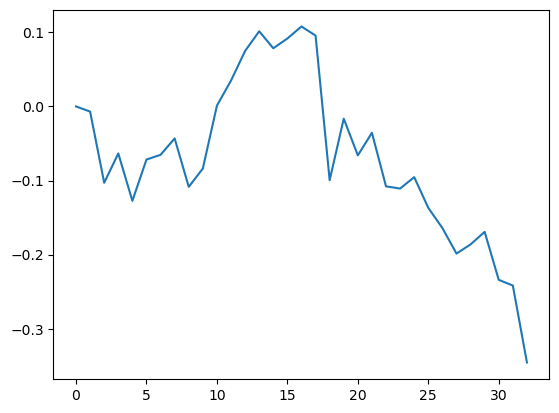

In [140]:
data_1["hsi_accu_return"].plot()

<AxesSubplot:>

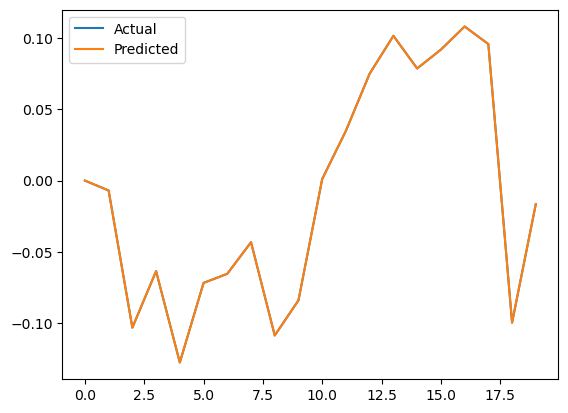

In [141]:
train_act_pred.plot()


<AxesSubplot:>

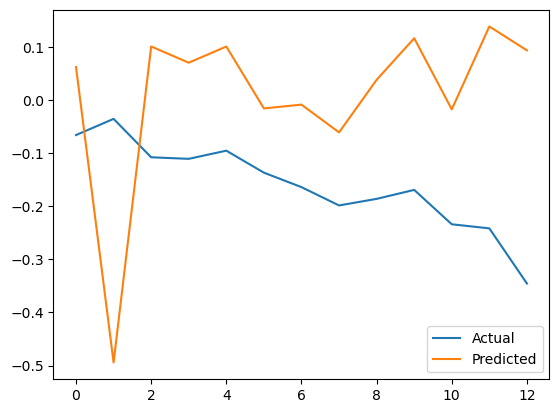

In [142]:
test_act_pred.plot()

In [143]:
overall_hsi=pd.concat([train_act_pred,test_act_pred],ignore_index=True);overall_hsi

,Actual,Predicted
0,0.000000,3.384879e-16
1,-0.006943,-6.943000e-03
2,-0.102960,-1.029601e-01
3,-0.063431,-6.343100e-02
4,-0.127359,-1.273590e-01
5,-0.071655,-7.165537e-02
6,-0.065265,-6.526452e-02
7,-0.043157,-4.315722e-02
8,-0.108449,-1.084491e-01
9,-0.083808,-8.380800e-02


<AxesSubplot:>

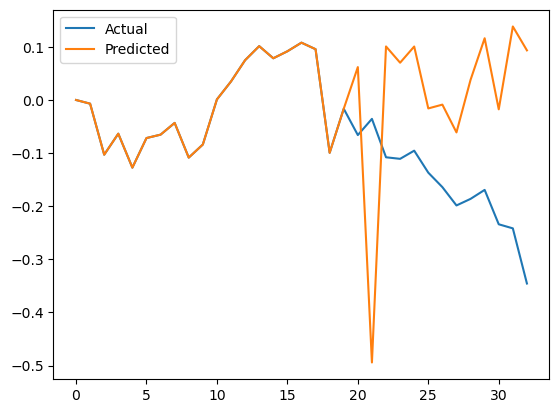

In [144]:
overall_hsi.plot()

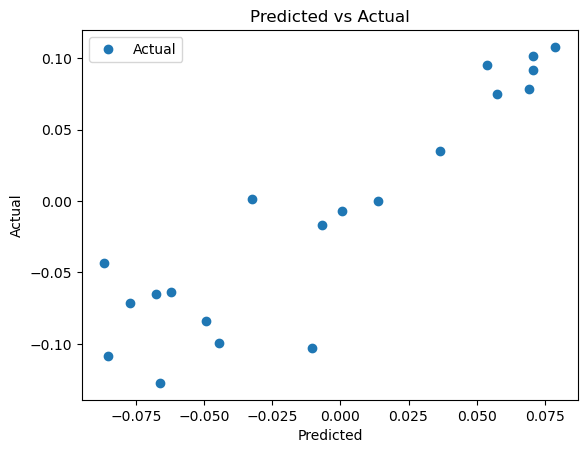

In [145]:
from sklearn.linear_model import Lasso
clf=Lasso(alpha=0.0015, fit_intercept=False)
clf.fit(X_train_trans, Y_train_shift)
Y_train_pred=clf.predict(X_train_trans)
train_act_pred=pd.DataFrame({"Actual": Y_train_shift, "Predicted": Y_train_pred})
train_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [146]:
clf.coef_

array([-0.        , -0.04824448, -0.13247203, -0.        ,  0.        ,
       -0.        , -0.        ,  0.03330711, -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.06728167, -0.        ,
        0.15987716, -0.        , -0.        ,  0.        ,  0.03794971,
        0.        , -0.        , -0.02427423, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.01254552, -0.        ])

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train_shift,Y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train_shift,Y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train_shift,Y_train_pred)))     
print('R-square:', metrics.r2_score(Y_train_shift,Y_train_pred))

Mean Absolute Error: 0.026700487824650572
Mean Squared Error: 0.0012386697414455416
Root Mean Squared Error: 0.03519474025256532
R-square: 0.7960931681297729


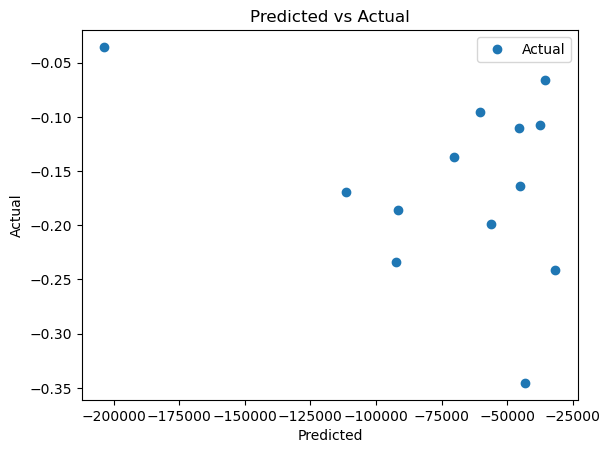

In [148]:
Y_test_pred = clf.predict(X_test_shift)
test_act_pred=pd.DataFrame({'Actual': Y_test_shift, 'Predicted': Y_test_pred})
test_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [149]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_shift,Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_shift,Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_shift,Y_test_pred)))     
print('R-square:', metrics.r2_score(Y_test_shift,Y_test_pred))

Mean Absolute Error: 71059.96916008952
Mean Squared Error: 7082154911.281411
Root Mean Squared Error: 84155.53999162154
R-square: -1109768028889.8145


In [150]:
overall_hsi_lasso=pd.concat([train_act_pred,test_act_pred],ignore_index=True);overall_hsi_lasso

,Actual,Predicted
0,0.000000,0.013821
1,-0.006943,0.000594
2,-0.102960,-0.010555
3,-0.063431,-0.062067
4,-0.127359,-0.066092
5,-0.071655,-0.077017
6,-0.065265,-0.067612
7,-0.043157,-0.086524
8,-0.108449,-0.085126
9,-0.083808,-0.049299


<AxesSubplot:>

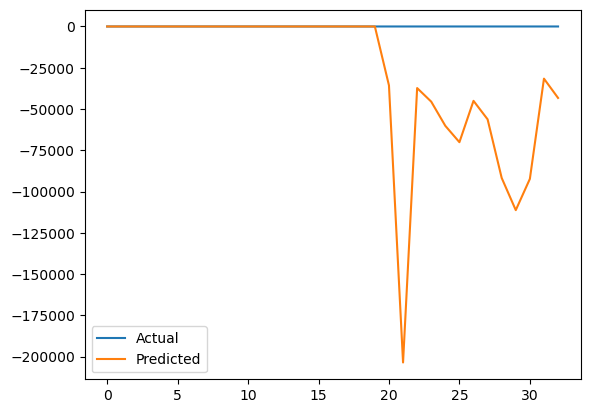

In [151]:
overall_hsi_lasso.plot()

In [152]:
from sklearn.linear_model import Ridge
clf=Ridge(alpha=0.0001, fit_intercept=False)
clf.fit(X_train_trans, Y_train_shift)
Y_train_pred=clf.predict(X_train_trans)
train_act_pred=pd.DataFrame({"Actual": Y_train_shift, "Predicted": Y_train_pred})

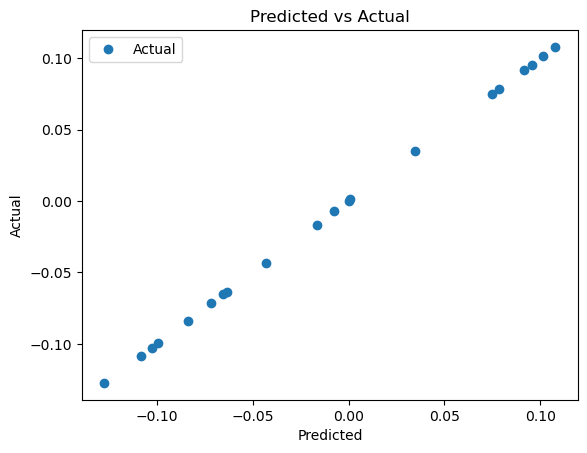

In [153]:
train_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [154]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train_shift,Y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train_shift,Y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train_shift,Y_train_pred)))     
print('R-square:', metrics.r2_score(Y_train_shift,Y_train_pred))

Mean Absolute Error: 0.00011604315667488297
Mean Squared Error: 4.137149620854026e-08
Root Mean Squared Error: 0.00020339984318710832
R-square: 0.9999931895238583


In [155]:
Y_test_pred = clf.predict(X_test_shift)
test_act_pred=pd.DataFrame({'Actual': Y_test_shift, 'Predicted': Y_test_pred})

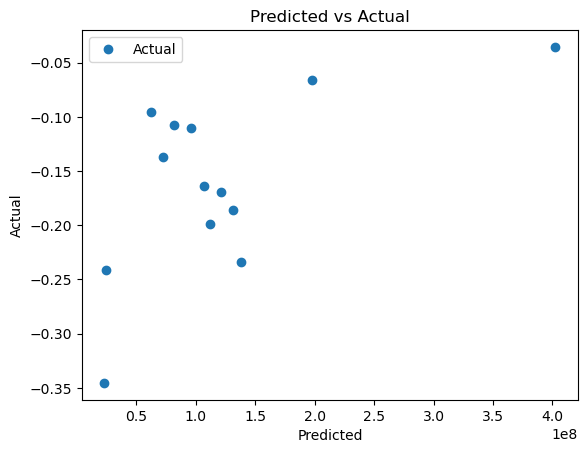

In [156]:
test_act_pred.plot(x='Predicted',y='Actual',style='o')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [157]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_shift,Y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_shift,Y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_shift,Y_test_pred)))     
print('R-square:', metrics.r2_score(Y_test_shift,Y_test_pred))

Mean Absolute Error: 120581171.32909419
Mean Squared Error: 2.3208987011193556e+16
Root Mean Squared Error: 152344960.57038957
R-square: -3.6368297630621184e+18


In [158]:
overall_hsi_ridge=pd.concat([train_act_pred,test_act_pred],ignore_index=True);overall_hsi_ridge

,Actual,Predicted
0,0.000000,2.266833e-04
1,-0.006943,-7.502466e-03
2,-0.102960,-1.023616e-01
3,-0.063431,-6.346395e-02
4,-0.127359,-1.273089e-01
5,-0.071655,-7.167533e-02
6,-0.065265,-6.525698e-02
7,-0.043157,-4.318727e-02
8,-0.108449,-1.084399e-01
9,-0.083808,-8.375726e-02


<AxesSubplot:>

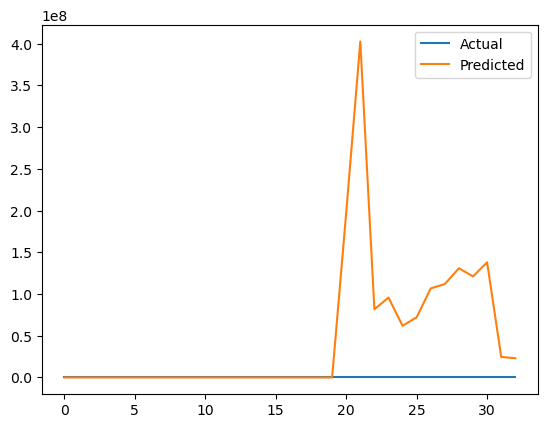

In [159]:
overall_hsi_ridge.plot()

Let's try polynomial regression

In [160]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
poly = PolynomialFeatures(degree=2, include_bias=False)

In [161]:
data_1

,pubdate,non_view_engagements,comment_count,like_count,dislike_count,love_count,haha_count,wow_count,angry_count,sad_count,...,ESG_label_content_Community Relations,ESG_label_content_Corporate Governance,ESG_label_content_Human Capital,ESG_label_content_Natural Capital,ESG_label_content_Non-ESG,ESG_label_content_Pollution & Waste,ESG_label_content_Product Liability,ESG_average,hsi_accu_return,monthly_return
0,2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,678.0,119.0,76.0,345.0,119.0,82.0,40.0,3512.0,0.000000,0.000000
1,2020-02-29,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,662.0,66.0,135.0,199.0,41.0,36.0,20.0,3072.0,-0.006943,-0.006943
2,2020-03-31,77617,5343.0,66490.0,403.0,1089.0,1104.0,698.0,358.0,468.0,...,935.0,246.0,173.0,286.0,78.0,101.0,42.0,4786.0,-0.102960,-0.096688
3,2020-04-30,302574,16880.0,260519.0,1658.0,1372.0,1488.0,3427.0,4391.0,3059.0,...,1257.0,1322.0,343.0,377.0,154.0,164.0,82.0,8662.0,-0.063431,0.044066
4,2020-05-31,431454,27328.0,356436.0,1666.0,5032.0,5711.0,10600.0,2452.0,5401.0,...,1937.0,353.0,317.0,1183.0,131.0,183.0,128.0,10954.0,-0.127359,-0.068258
5,2020-06-30,704458,48525.0,476359.0,2053.0,10146.0,52566.0,25430.0,29415.0,14478.0,...,3429.0,228.0,536.0,3366.0,118.0,276.0,188.0,19540.0,-0.071655,0.063834
6,2020-07-31,686330,48525.0,426365.0,1773.0,9738.0,35972.0,21400.0,13327.0,81250.0,...,4923.0,559.0,818.0,4158.0,179.0,302.0,143.0,25888.0,-0.065265,0.006884
7,2020-08-31,785860,56417.0,535467.0,1199.0,29514.0,40866.0,21853.0,32184.0,21141.0,...,5392.0,430.0,647.0,3363.0,332.0,433.0,237.0,28088.0,-0.043157,0.023651
8,2020-09-30,465961,28229.0,385099.0,782.0,5624.0,12786.0,9771.0,2072.0,9045.0,...,2714.0,1546.0,295.0,1742.0,304.0,246.0,238.0,17198.0,-0.108449,-0.068237
9,2020-10-31,615910,38633.0,466660.0,1010.0,7367.0,28696.0,20774.0,12468.0,4804.0,...,3303.0,296.0,490.0,1252.0,467.0,211.0,193.0,16866.0,-0.083808,0.027638


In [162]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [163]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [164]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
from sklearn.metrics import mean_squared_error
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse_test 

3.6797883996318728

In [165]:
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted));poly_reg_rmse_train 

8.295623810647647e-14

In [166]:
X_test

array([[2.48484000e+05, 1.41240000e+04, 2.34360000e+05, ...,
        3.13600000e+03, 4.51808000e+05, 6.50926240e+07],
       [1.26016000e+05, 4.56900000e+03, 1.09061000e+05, ...,
        2.80900000e+03, 6.65892000e+05, 1.57854096e+08],
       [3.60067000e+05, 1.40260000e+04, 3.35970000e+05, ...,
        8.64900000e+03, 1.02690600e+06, 1.21925764e+08],
       ...,
       [1.83643200e+06, 1.09256000e+05, 1.51111100e+06, ...,
        1.02400000e+05, 1.25107200e+07, 1.52849722e+09],
       [7.85630000e+04, 2.00090000e+04, 4.81210000e+04, ...,
        2.11600000e+03, 4.16116000e+05, 8.18301160e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.60000000e+03, 1.40480000e+05, 1.23341440e+07]])

In [167]:
poly_reg_y_predicted 

array([-9.93061571e-02, -1.07645029e+00, -2.99170473e-01,  2.95495534e+00,
        3.64861056e+00,  4.08615021e+00, -4.75577682e-01, -9.73538601e+00,
        2.41422152e-01, -6.94300373e-03])

In [168]:
y_train,y_test

(4    -0.127359
 16    0.107901
 5    -0.071655
 13    0.101380
 11    0.034907
 24   -0.095406
 1    -0.006943
 2    -0.102960
 29   -0.169228
 3    -0.063431
 27   -0.198507
 23   -0.110782
 30   -0.233961
 22   -0.107833
 18   -0.099449
 25   -0.136802
 6    -0.065265
 20   -0.066014
 32   -0.345454
 7    -0.043157
 10    0.001097
 14    0.078507
 28   -0.186125
 Name: hsi_accu_return, dtype: float64,
 31   -0.241642
 15    0.091677
 26   -0.164019
 17    0.095594
 8    -0.108449
 9    -0.083808
 19   -0.016480
 21   -0.035549
 12    0.074910
 0     0.000000
 Name: hsi_accu_return, dtype: float64)

In [169]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly2=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly2=overall_hsi_poly2.sort_index();overall_hsi_poly2

,Actual,Predicted
0,0.000000,-0.006943
1,-0.006943,-0.006943
2,-0.102960,-0.102960
3,-0.063431,-0.063431
4,-0.127359,-0.127359
5,-0.071655,-0.071655
6,-0.065265,-0.065265
7,-0.043157,-0.043157
8,-0.108449,3.648611
9,-0.083808,4.086150


<AxesSubplot:>

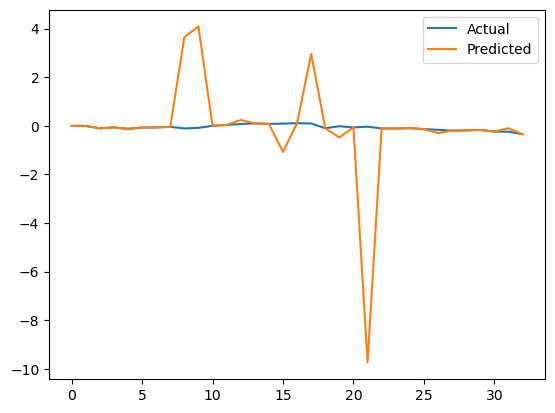

In [170]:
overall_hsi_poly2.plot()

In [171]:
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse_train,poly_reg_rmse_test) 

1.7465688338262743e-11 5868.8503000650235


In [172]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly3=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly3=overall_hsi_poly3.sort_index();overall_hsi_poly3

,Actual,Predicted
0,0.000000,-0.006943
1,-0.006943,-0.006943
2,-0.102960,-0.102960
3,-0.063431,-0.063431
4,-0.127359,-0.127359
5,-0.071655,-0.071655
6,-0.065265,-0.065265
7,-0.043157,-0.043157
8,-0.108449,18526.194367
9,-0.083808,39.649606


<AxesSubplot:>

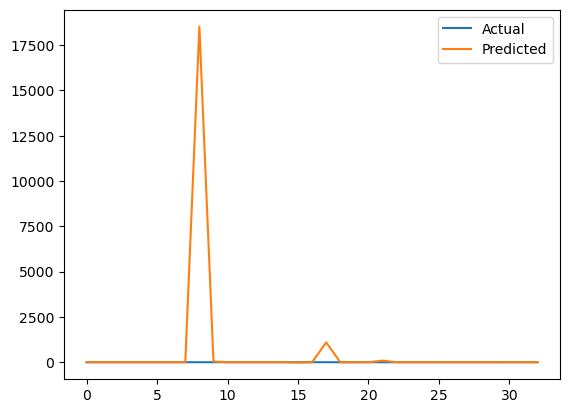

In [173]:
overall_hsi_poly3.plot()

In [174]:
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse_train,poly_reg_rmse_test) 

0.014183950473752864 6285258.4033073485


In [175]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly5=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly5=overall_hsi_poly3.sort_index();overall_hsi_poly5

,Actual,Predicted
0,0.000000,-0.006943
1,-0.006943,-0.006943
2,-0.102960,-0.102960
3,-0.063431,-0.063431
4,-0.127359,-0.127359
5,-0.071655,-0.071655
6,-0.065265,-0.065265
7,-0.043157,-0.043157
8,-0.108449,18526.194367
9,-0.083808,39.649606


<AxesSubplot:>

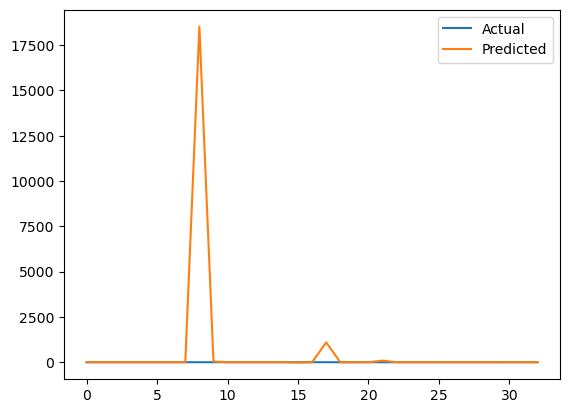

In [176]:
overall_hsi_poly5.plot()

In [178]:
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse_train,poly_reg_rmse_test)

0.014347283578209793 893405601.6642722


In [179]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly6=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly6=overall_hsi_poly6.sort_index();overall_hsi_poly6

,Actual,Predicted
0,0.000000,-5.452055e-02
1,-0.006943,-5.452055e-02
2,-0.102960,-5.441773e-02
3,-0.063431,-6.298229e-02
4,-0.127359,-1.268589e-01
5,-0.071655,-7.117465e-02
6,-0.065265,-6.479551e-02
7,-0.043157,-5.364058e-02
8,-0.108449,-2.825141e+09
9,-0.083808,5.067137e+03


<AxesSubplot:>

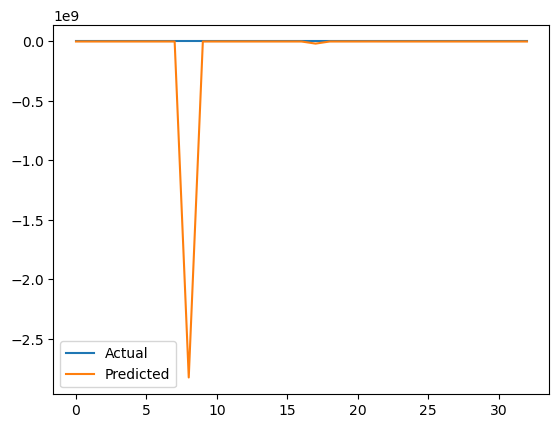

In [180]:
overall_hsi_poly6.plot()

In [181]:
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = Lasso()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse_train,poly_reg_rmse_test) 

0.0003766533055781618 0.32684970855838763


In [185]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly_lasso2=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly_lasso2=overall_hsi_poly_lasso2.sort_index();overall_hsi_poly_lasso2

,Actual,Predicted
0,0.000000,-0.042794
1,-0.006943,-0.042794
2,-0.102960,-0.046937
3,-0.063431,-0.070894
4,-0.127359,-0.104441
5,-0.071655,-0.071501
6,-0.065265,-0.064941
7,-0.043157,-0.034665
8,-0.108449,5.377721
9,-0.083808,0.345343


<AxesSubplot:>

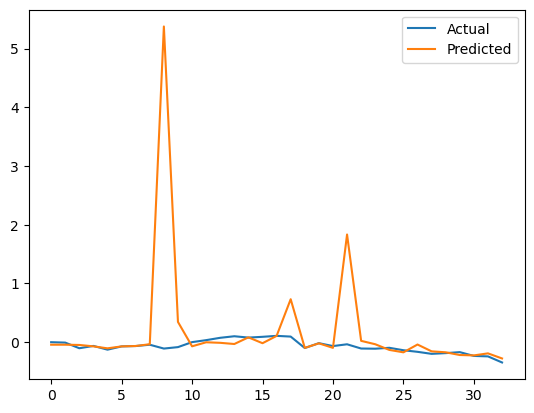

In [186]:
overall_hsi_poly_lasso2.plot()

In [187]:
X,y=data_1[name],data_1["hsi_accu_return"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
poly_reg_model = Ridge()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_train_predicted = poly_reg_model.predict(X_train)
poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_train_predicted))
poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse_train,poly_reg_rmse_test) 

0.052989718475509186 1.849938759624598


In [188]:
test_act_pred=pd.DataFrame({'Actual': y_test, 'Predicted': poly_reg_y_predicted})
train_act_pred=pd.DataFrame({"Actual": y_train, "Predicted": poly_reg_train_predicted})
overall_hsi_poly_ridge2=pd.concat([train_act_pred,test_act_pred])
overall_hsi_poly_ridge2=overall_hsi_poly_ridge2.sort_index();overall_hsi_poly_ridge2

,Actual,Predicted
0,0.000000,-0.042794
1,-0.006943,-0.042794
2,-0.102960,-0.046937
3,-0.063431,-0.070894
4,-0.127359,-0.104441
5,-0.071655,-0.071501
6,-0.065265,-0.064941
7,-0.043157,-0.034665
8,-0.108449,5.377721
9,-0.083808,0.345343


<AxesSubplot:>

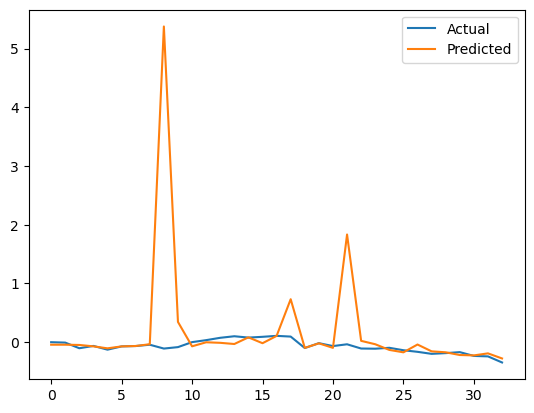

In [189]:
overall_hsi_poly_ridge2.plot()